In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os
from density import Peak
import pybedtools
from tqdm import tnrange, tqdm_notebook

In [84]:
series = pd.Series([0, 0, 0, 1, 1, 0, 0, 2, 2, 3])
series

0    0
1    0
2    0
3    1
4    1
5    0
6    0
7    2
8    2
9    3
dtype: int64

In [103]:
bb = '/projects/ps-yeolab3/bay001/maps/current_annotations/se_peak_bigbeds/204_01.basedon_204_01.peaks.l2inputnormnew.bed.compressed.bed.p3f3.bed.sorted.bed.bb'
p = Peak.Peak(bb, name='204_01_RBFOX2')
values = p.values('chr10', 113918351, 113918701, '-')
for value in values:
    print('{} '.format(value)),
    
print(len(values))

1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [86]:
wd = '/home/bay001/projects/eric_clip_paper_20180120/permanent_data/conservation/outputs/phastcon_maps'
n = '204_01.basedon_204_01.peaks.l2inputnormnew.bed.compressed.bed.p3f3.bed.sorted.bed.bb.PROXINTRON.HepG2_RBFOX2_204_intersecting_PROXINTRON.50start300.bed.phastcon.raw_density.txt'

In [87]:
df = pd.read_table(os.path.join(wd, n), sep=',', index_col=0)
print(df.shape)
df.head()

(1587, 350)


,0,1,2,3,4,5,6,7,8,9,...,340,341,342,343,344,345,346,347,348,349
chr10:105452485-105452835:ENST00000369774.4:-,0.987,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,0.002,0.000,0.001,0.000,0.000,0.001,0.001,0.000,0.000,0.000
chr10:1061142-1061492:ENST00000545048.1:+,0.003,0.003,0.002,0.001,0.000,0.001,0.002,0.008,0.026,0.053,...,0.039,0.036,0.032,0.028,0.030,0.031,0.032,0.032,0.032,0.031
chr10:112631484-112631834:ENST00000420367.1:-,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
chr10:113918351-113918701:ENST00000348367.4:-,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
chr10:114711316-114711666:ENST00000369397.4:+,1.000,1.000,1.000,1.000,0.998,1.000,1.000,1.000,1.000,1.000,...,0.000,0.000,0.000,0.000,0.001,0.001,0.006,0.008,0.016,0.102


In [100]:
def bedtool_from_renamed_index(name):
    """
    Turns the renamed index name into a bedtool (see above func: rename_index())

    Parameters
    ----------
    name

    Returns
    -------

    """
    chrom, pos, name, strand = name.split(':')
    start, end = pos.split('-')
    interval = pybedtools.create_interval_from_list(
        [chrom, start, end, name, '0', strand]
    )
    return interval

def mask(df, peak):
    """
    masks the intervals in df based on where peaks are. If a peak does not directly overlap
    the region at a given position, mask that position with nan. If a peak does overlap,
    preserve the score.
    
    Parameters
    ----------
    df: pandas.DataFrame
    peak: density.Peak

    Returns
    -------
    masked: pandas.DataFrame
    """
    progress = tnrange(len(df.index))
    for i in df.index:
        region = bedtool_from_renamed_index(i)
        masked_interval = peak.values(region.chrom, region.start, region.end, region.strand)
        for pos in masked_interval.index:
            df.loc[i, str(pos)] = df.loc[i, str(pos)] if masked_interval.loc[pos] > 0 else np.nan
        progress.update(1)
    return df

In [104]:
mask(df, p).to_csv('/home/bay001/test.df.txt', sep='\t')

HBox(children=(IntProgress(value=0, max=1587), HTML(value=u'')))

In [105]:
pd.read_table('/home/bay001/test.df.txt')

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,125.1,126.1,127.1,128.1,129.1,130.1,131.1,132.1,133.1,134.1
0,chr10:105452485-105452835:ENST00000369774.4:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chr10:1061142-1061492:ENST00000545048.1:+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chr10:112631484-112631834:ENST00000420367.1:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr10:113918351-113918701:ENST00000348367.4:-,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chr10:114711316-114711666:ENST00000369397.4:+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,chr10:114903734-114904084:ENST00000369397.4:+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,chr10:118646277-118646627:ENST00000355371.4:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,chr10:121355645-121355995:ENST00000369093.2:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,chr10:124913951-124914301:ENST00000368858.5:+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,chr10:45465662-45466012:ENST00000374417.2:+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
wd = '/home/bay001/projects/eric_clip_paper_20180120/permanent_data/conservation/outputs/phastcon_maps_peaksonly/'
df = pd.read_table(
    os.path.join(wd, '218.01v02.IDR.out.0102merged.bed.p0f0.bed.sorted.bed.bb.PROXINTRON.HepG2_TRA2A_218_intersecting_PROXINTRON.50start300.bed.phastcon.raw_density.txt'),
    sep=',',
    index_col=0

)
df[['349']].dropna()

,349
chr11:118888691-118889041:ENST00000527673.1:-,0.827
chr12:56510945-56511295:ENST00000501597.3:+,1.000
chr12:56814834-56815184:ENST00000553532.1:-,0.001
chr12:6687711-6688061:ENST00000544040.1:-,1.000
chr12:6696577-6696927:ENST00000544040.1:-,1.000
chr12:6711241-6711591:ENST00000544040.1:-,1.000
chr12:6878790-6879140:ENST00000309083.6:+,1.000
chr12:76453617-76453967:ENST00000548044.1:-,1.000
chr12:80214557-80214907:ENST00000450142.2:-,1.000
chr14:24113702-24114052:ENST00000250383.6:+,0.000


In [133]:
ct = 0
for i in df.loc['chr10:101556303-101556653:ENST00000370449.4:+']:
    print(ct, i)
    ct+=1

(0, 0.00300000002608)
(1, 0.0040000001899899995)
(2, 0.0040000001899899995)
(3, 0.0020000000949900003)
(4, 0.0010000000474999998)
(5, 0.0020000000949900003)
(6, 0.0020000000949900003)
(7, 0.0020000000949900003)
(8, 0.0040000001899899995)
(9, 0.0040000001899899995)
(10, 0.0120000001043)
(11, 0.0170000009239)
(12, 0.019999999553)
(13, 0.0280000008643)
(14, 0.0320000015199)
(15, 0.0439999997616)
(16, 0.0579999983311)
(17, 0.0610000006855)
(18, 0.0729999989271)
(19, 0.0790000036359)
(20, 0.082000002265)
(21, nan)
(22, nan)
(23, nan)
(24, nan)
(25, nan)
(26, nan)
(27, nan)
(28, nan)
(29, nan)
(30, nan)
(31, nan)
(32, nan)
(33, nan)
(34, nan)
(35, nan)
(36, nan)
(37, nan)
(38, nan)
(39, nan)
(40, nan)
(41, nan)
(42, nan)
(43, nan)
(44, nan)
(45, nan)
(46, nan)
(47, nan)
(48, nan)
(49, nan)
(50, nan)
(51, nan)
(52, nan)
(53, nan)
(54, nan)
(55, nan)
(56, nan)
(57, nan)
(58, nan)
(59, nan)
(60, nan)
(61, nan)
(62, nan)
(63, nan)
(64, nan)
(65, nan)
(66, nan)
(67, nan)
(68, nan)
(69, nan)
(70, 

(0, 0.2)

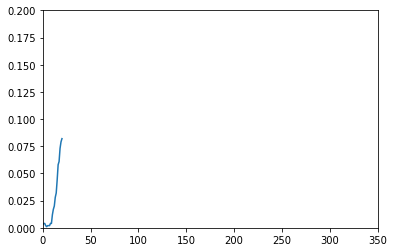

In [134]:
plt.plot(range(350), df.loc['chr10:101556303-101556653:ENST00000370449.4:+'])
plt.xlim(0, 350)
plt.ylim(0, 0.2)

(0, 1)

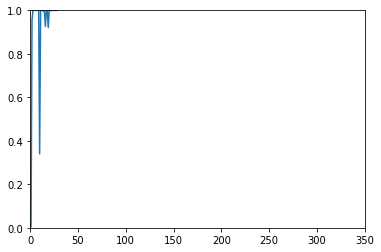

In [136]:
plt.plot(range(350), df.loc['chr10:101590558-101590908:ENST00000370449.4:+'])
plt.xlim(0, 350)
plt.ylim(0, 1)

(0, 0.2)

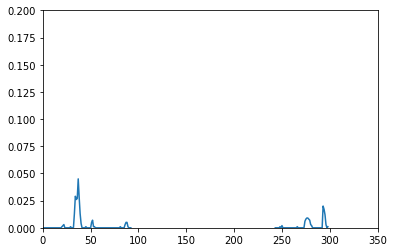

In [130]:
plt.plot(range(350), df.loc['chr10:113918351-113918701:ENST00000348367.4:-'])
plt.xlim(0, 350)
plt.ylim(0, 0.2)

In [131]:
max(df.loc['chr10:113918351-113918701:ENST00000348367.4:-'])

0.04500000178809999